In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
dt=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
dt

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
dt.shape

(374, 13)

In [4]:
dt.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [5]:
dt.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
dt.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [7]:
dt.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
dt['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [9]:
dt['Sleep Disorder']=dt['Sleep Disorder'].fillna('No Disorder')

In [10]:
dt=dt.drop(['Person ID','Sleep Duration'],axis=1)
dt

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# EDA (Data Visualization)

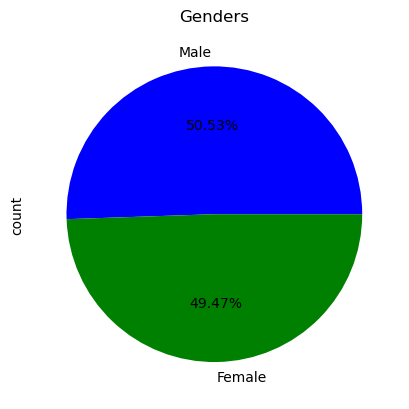

In [11]:
labels=['Male','Female']
dt['Gender'].value_counts().plot.pie(autopct="%0.2f%%",labels=labels,colors=['blue','green'])
plt.title('Genders')
plt.show()

In [12]:
dt['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Text(0.5, 1.0, 'Occupation')

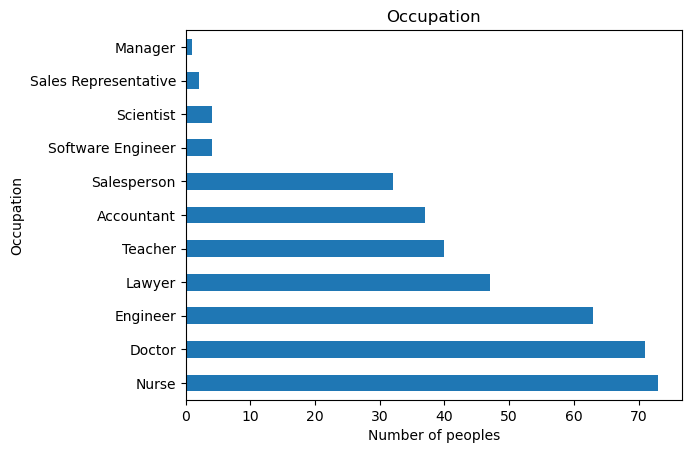

In [13]:
dt['Occupation'].value_counts().plot.barh()
plt.xlabel('Number of peoples')
plt.title('Occupation')

<Axes: ylabel='count'>

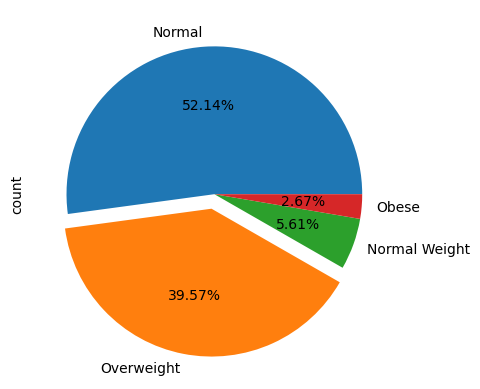

In [14]:
l=['Normal','Overweight','Normal Weight','Obese']
dt['BMI Category'].value_counts().plot.pie(autopct="%0.2f%%",labels=l,explode=[0,0.1,0,0])

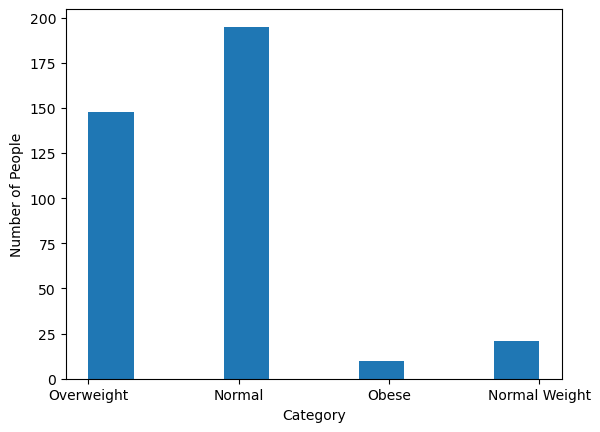

In [15]:
dt['BMI Category'].hist()
plt.grid()
plt.xlabel('Category')
plt.ylabel('Number of People')
plt.show()

<Axes: xlabel='Quality of Sleep', ylabel='Heart Rate'>

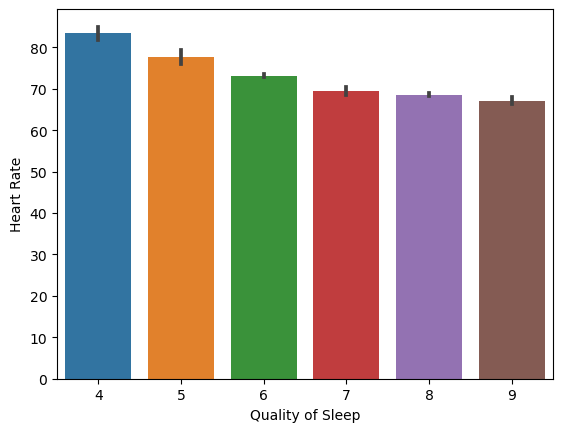

In [16]:
sns.barplot(x=dt['Quality of Sleep'],y=dt['Heart Rate'])

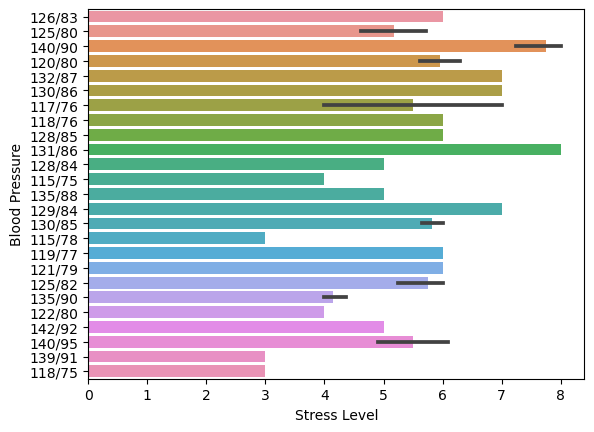

In [17]:
sns.barplot(x=dt['Stress Level'],y=dt['Blood Pressure'])
plt.show()

# Model Training

In [18]:
le=LabelEncoder()
dt['Gender']=le.fit_transform(dt['Gender'])
dt['BMI Category']=le.fit_transform(dt['BMI Category'])
dt['Sleep Disorder']=le.fit_transform(dt['Sleep Disorder'])
dt['Occupation']=le.fit_transform(dt['Occupation'])
dt['Blood Pressure']=le.fit_transform(dt['Blood Pressure'])

In [19]:
dt

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6,42,6,3,11,77,4200,1
1,1,28,1,6,60,8,0,9,75,10000,1
2,1,28,1,6,60,8,0,9,75,10000,1
3,1,28,6,4,30,8,2,22,85,3000,2
4,1,28,6,4,30,8,2,22,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,75,3,3,23,68,7000,2
370,0,59,5,9,75,3,3,23,68,7000,2
371,0,59,5,9,75,3,3,23,68,7000,2
372,0,59,5,9,75,3,3,23,68,7000,2


In [20]:
x=dt.drop('Sleep Disorder',axis=1)
y=dt['Sleep Disorder']

In [21]:
x

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6,42,6,3,11,77,4200
1,1,28,1,6,60,8,0,9,75,10000
2,1,28,1,6,60,8,0,9,75,10000
3,1,28,6,4,30,8,2,22,85,3000
4,1,28,6,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,75,3,3,23,68,7000
370,0,59,5,9,75,3,3,23,68,7000
371,0,59,5,9,75,3,3,23,68,7000
372,0,59,5,9,75,3,3,23,68,7000


In [22]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [24]:
logscore=cross_val_score(LogisticRegression(),X=x,y=y,cv=8)
Dt_score=cross_val_score(DecisionTreeClassifier(max_depth=3),X=x,y=y,cv=8)
Rf_score=cross_val_score(RandomForestClassifier(n_estimators=30,random_state=40),X=x,y=y,cv=8)
SVC_score=cross_val_score(SVC(),X=x,y=y,cv=8)
Kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=20),X=x,y=y,cv=8)
AB_score=cross_val_score(AdaBoostClassifier(random_state=40),X=x,y=y,cv=8)
GN_score=cross_val_score(GaussianNB(),X=x,y=y,cv=8)
Gb_score=cross_val_score(GradientBoostingClassifier(random_state=40),X=x,y=y,cv=8)

In [25]:
print(logscore)
print(Dt_score)
print(Rf_score)
print(SVC_score)
print(Kn_score)
print(AB_score)
print(GN_score)
print(Gb_score)

[0.70212766 0.82978723 0.87234043 1.         1.         0.9787234
 0.84782609 0.41304348]
[0.65957447 0.82978723 0.82978723 1.         1.         0.9787234
 0.86956522 0.89130435]
[0.72340426 0.85106383 0.72340426 1.         1.         0.42553191
 0.86956522 0.89130435]
[0.59574468 0.63829787 0.74468085 0.78723404 0.78723404 0.57446809
 0.56521739 0.56521739]
[0.55319149 0.82978723 0.82978723 0.9787234  0.9787234  0.87234043
 0.80434783 0.82608696]
[0.76595745 0.80851064 0.85106383 0.91489362 1.         0.4893617
 0.65217391 0.82608696]
[0.70212766 0.85106383 0.87234043 0.9787234  0.9787234  0.95744681
 0.82608696 0.86956522]
[0.74468085 0.85106383 0.57446809 1.         1.         0.53191489
 0.86956522 0.76086957]


In [26]:
print(np.mean(logscore))
print(np.mean(Dt_score))
print(np.mean(Rf_score))
print(np.mean(SVC_score))
print(np.mean(Kn_score))
print(np.mean(AB_score))
print(np.mean(GN_score))
print(np.mean(Gb_score))

0.8304810360777057
0.8823427382053654
0.8105342275670675
0.6572617946345976
0.8341234967622572
0.7885060129509712
0.8795097132284921
0.7915703052728955


In [27]:
model=DecisionTreeClassifier(max_depth=3)

In [28]:
gscv=GridSearchCV(model,{'max_depth':[10,20,30,40,50]})
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [10, 20, 30, 40, 50]})

In [29]:
gscv_data=gscv.cv_results_

In [30]:
DF=pd.DataFrame(gscv_data)
DF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009455,0.003418,0.003263,0.000501,10,{'max_depth': 10},0.933333,0.916667,0.883333,0.9,0.830508,0.892768,0.035311,4
1,0.009545,0.002707,0.005404,0.002266,20,{'max_depth': 20},0.933333,0.883333,0.900000,0.9,0.830508,0.889435,0.033645,5
2,0.005889,0.001628,0.005652,0.002036,30,{'max_depth': 30},0.933333,0.916667,0.900000,0.9,0.830508,0.896102,0.035048,1
3,0.010186,0.003357,0.005471,0.003129,40,{'max_depth': 40},0.933333,0.916667,0.900000,0.9,0.830508,0.896102,0.035048,1
4,0.007976,0.002531,0.004702,0.002892,50,{'max_depth': 50},0.933333,0.916667,0.900000,0.9,0.830508,0.896102,0.035048,1


In [31]:
gscv.best_params_

{'max_depth': 30}

In [32]:
gscv.best_score_

0.8961016949152543

In [33]:
ypred=gscv.predict(x_test)


In [34]:
data=pd.DataFrame({'true y Value':y_test,'predicted y values':ypred})
data

,true y Value,predicted y values
181,1,1
90,1,1
287,2,2
117,1,1
110,1,1
...,...,...
364,2,2
238,0,0
350,2,2
195,0,0


In [35]:
cm=confusion_matrix(y_test,ypred)
cm

array([[14,  2,  0],
       [ 0, 46,  2],
       [ 0,  2,  9]], dtype=int64)

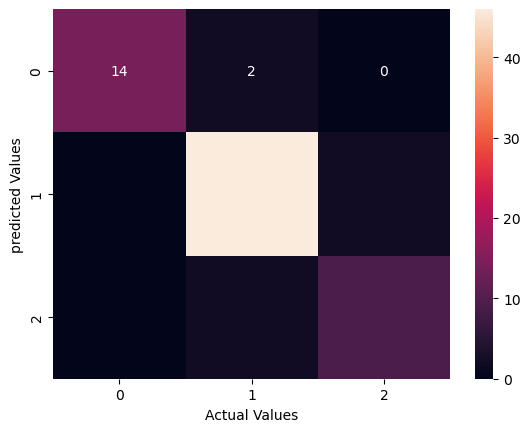

In [36]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('predicted Values')
plt.show()

In [37]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.92      0.96      0.94        48
           2       0.82      0.82      0.82        11

    accuracy                           0.92        75
   macro avg       0.91      0.88      0.90        75
weighted avg       0.92      0.92      0.92        75



# Conclusion

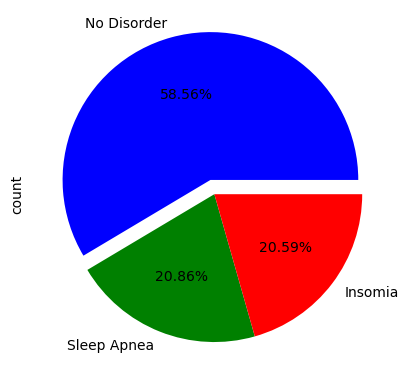

In [38]:
labels=['No Disorder','Sleep Apnea','Insomia']
dt['Sleep Disorder'].value_counts().plot.pie(autopct="%0.2f%%",labels=labels,explode=[0.1,0,0],colors=['blue','green','red'])
plt.show()

In [39]:
dt['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

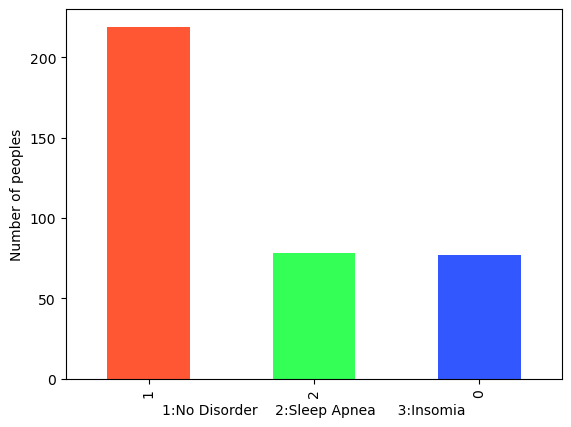

In [48]:
colors = ['#FF5733', '#33FF57', '#3357FF']
dt['Sleep Disorder'].value_counts().plot.bar(color=colors)
plt.xlabel('1:No Disorder    2:Sleep Apnea     3:Insomia')
plt.ylabel('Number of peoples')
plt.show()